In [4]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('cryptocurrency_data.csv')

# Mostrar las primeras filas del DataFrame para verificar que se cargaron correctamente
print(df.head())


     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11046   
1  1027     Ethereum    ETH  ethereum              8935   
2   825  Tether USDt   USDT    tether             85589   
3  1839          BNB    BNB       bnb              2159   
4  5426       Solana    SOL    solana               660   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags  max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value...  21000000.0   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...         NaN   
2  ['stablecoin', 'asset-backed-stablecoin', 'ava...         NaN   
3  ['marketplace', 'centralized-exchange', 'payme...         NaN   
4  ['pos', 'platform', 'solana-ecosystem', 'cms-h...         NaN   

   circulating_supply  total_supply  ...  quote.U

In [5]:
# Filtrar criptomonedas con volumen de operaciones mayor a 1 millón
df_filtered = df[df['quote.USD.volume_24h'] > 1_000_000]

# Clasificar según cambio porcentual en 24 horas y en 7 días
df_filtered = df_filtered.sort_values(by=['quote.USD.percent_change_7d', 'quote.USD.percent_change_24h'], ascending=False)

# Seleccionar las top 10 criptomonedas
top_cryptos = df_filtered.head(10)

print(top_cryptos[['name', 'symbol', 'quote.USD.volume_24h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']])


                                    name   symbol  quote.USD.volume_24h  \
490                                Turbo    TURBO          3.657698e+07   
429                                Ponke    PONKE          2.626542e+07   
243                      ConstitutionDAO   PEOPLE          5.732660e+08   
222                                 MAGA    TRUMP          1.680557e+07   
242                             Mog Coin      MOG          1.513621e+07   
384  HarryPotterObamaSonic10Inu (ERC-20)  BITCOIN          3.789332e+06   
317                            BounceBit       BB          1.639902e+08   
232                         Apu Apustaja      APU          2.020395e+07   
111                             Livepeer      LPT          1.427603e+08   
476                                BENQI       QI          9.764761e+06   

     quote.USD.percent_change_24h  quote.USD.percent_change_7d  
490                     18.492749                    80.010688  
429                     17.756818           

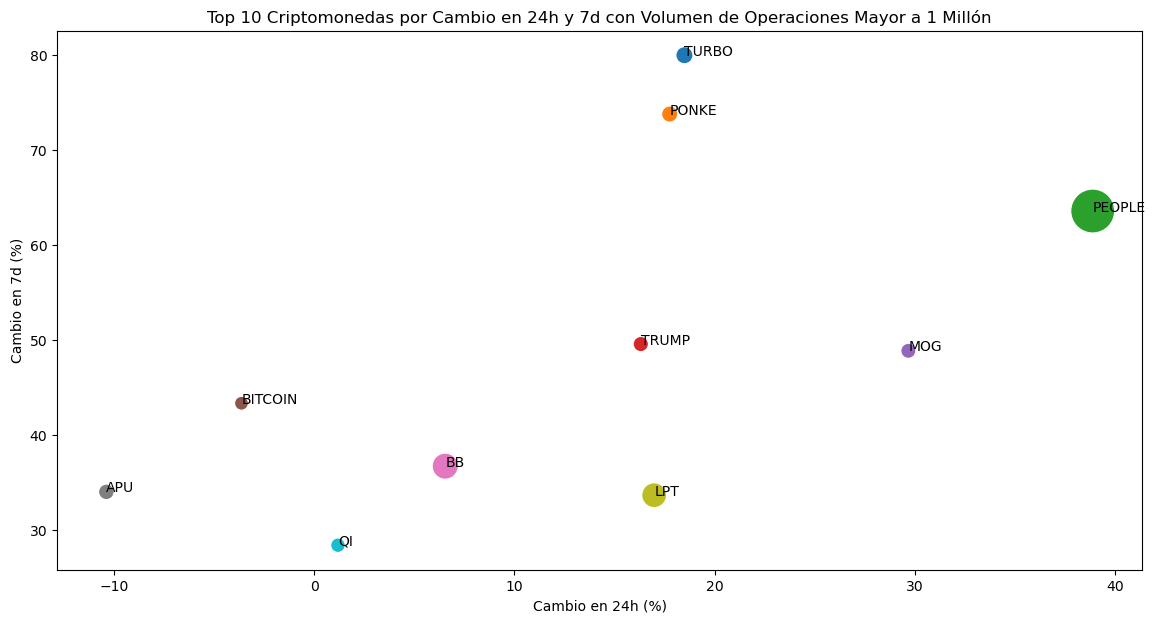

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 7))

# Crear una gráfica de dispersión para cambio en 24 horas vs cambio en 7 días
sns.scatterplot(data=top_cryptos, x='quote.USD.percent_change_24h', y='quote.USD.percent_change_7d', size='quote.USD.volume_24h', hue='name', legend=False, sizes=(100, 1000))

# Añadir etiquetas y título
for i in range(top_cryptos.shape[0]):
    plt.text(x=top_cryptos['quote.USD.percent_change_24h'].iloc[i], y=top_cryptos['quote.USD.percent_change_7d'].iloc[i], s=top_cryptos['symbol'].iloc[i], fontsize=10)
plt.title('Top 10 Criptomonedas por Cambio en 24h y 7d con Volumen de Operaciones Mayor a 1 Millón')
plt.xlabel('Cambio en 24h (%)')
plt.ylabel('Cambio en 7d (%)')
plt.show()


Machine learning solution

In [8]:
import pandas as pd
import numpy as np

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('cryptocurrency_data.csv')

# Seleccionar las características relevantes
features = ['quote.USD.volume_24h', 'quote.USD.market_cap', 'quote.USD.percent_change_1h', 
            'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d']

# Asegurarse de que solo trabajamos con columnas numéricas
numeric_features = df[features].select_dtypes(include=[np.number])

# Llenar los valores faltantes con la media solo en las columnas numéricas
numeric_features = numeric_features.fillna(numeric_features.mean())

# Reemplazar las características originales con las características numéricas llenadas
df[features] = numeric_features

# Definir las características (X) y la variable objetivo (y)
X = df[features]
y = df['quote.USD.percent_change_7d']  # Usamos el cambio en 7 días como la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 2.7834928218324757


In [10]:
# Predecir el desempeño en el conjunto completo de datos
df['predicted_change_7d'] = model.predict(X)

# Seleccionar las top 10 criptomonedas basadas en la predicción
top_cryptos_ml = df.sort_values(by='predicted_change_7d', ascending=False).head(10)

# Mostrar las criptomonedas seleccionadas
print(top_cryptos_ml[['name', 'symbol', 'quote.USD.volume_24h', 'quote.USD.percent_change_24h', 'predicted_change_7d']])


                                    name   symbol  quote.USD.volume_24h  \
490                                Turbo    TURBO          3.657698e+07   
429                                Ponke    PONKE          2.626542e+07   
243                      ConstitutionDAO   PEOPLE          5.732660e+08   
410                             Polymath     POLY          8.161969e+03   
242                             Mog Coin      MOG          1.513621e+07   
384  HarryPotterObamaSonic10Inu (ERC-20)  BITCOIN          3.789332e+06   
222                                 MAGA    TRUMP          1.680557e+07   
317                            BounceBit       BB          1.639902e+08   
232                         Apu Apustaja      APU          2.020395e+07   
111                             Livepeer      LPT          1.427603e+08   

     quote.USD.percent_change_24h  predicted_change_7d  
490                     18.492749            65.370054  
429                     17.756818            65.370054  
243

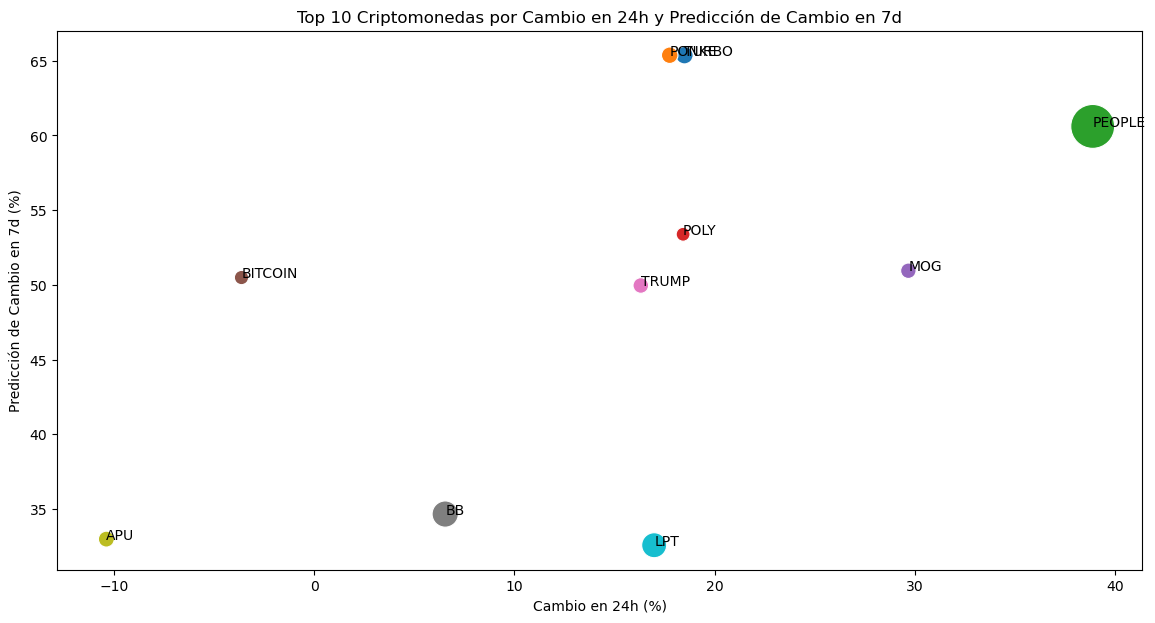

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 7))

# Crear una gráfica de dispersión para cambio en 24 horas vs cambio en 7 días predicho
sns.scatterplot(data=top_cryptos_ml, x='quote.USD.percent_change_24h', y='predicted_change_7d', size='quote.USD.volume_24h', hue='name', legend=False, sizes=(100, 1000))

# Añadir etiquetas y título
for i in range(top_cryptos_ml.shape[0]):
    plt.text(x=top_cryptos_ml['quote.USD.percent_change_24h'].iloc[i], y=top_cryptos_ml['predicted_change_7d'].iloc[i], s=top_cryptos_ml['symbol'].iloc[i], fontsize=10)
plt.title('Top 10 Criptomonedas por Cambio en 24h y Predicción de Cambio en 7d')
plt.xlabel('Cambio en 24h (%)')
plt.ylabel('Predicción de Cambio en 7d (%)')
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Definir una lista de modelos a probar
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression()
}

# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Mostrar los resultados de la evaluación
for name, mse in results.items():
    print(f"{name}: MSE = {mse}")


Random Forest: MSE = 3.2740735057407937
Gradient Boosting: MSE = 5.865872734606069
SVR: MSE = 170.76717912424508
Linear Regression: MSE = 6.637501463990849e-29
